<a href="https://colab.research.google.com/github/YunusKaratepe/duygu-tanima/blob/main/cnn_train_yunus_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import drive and arrange path.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/colab/final_project

/content/drive/MyDrive/colab/final_project


In [ ]:
%pwd # displays current path

'/content/drive/MyDrive/colab/final_project'

# Import libraries.

In [ ]:
import keras
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras.models import Model
from tensorflow.keras import activations

In [ ]:
# checking gpu device
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Found GPU at: /device:GPU:0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18246028955128570486, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12514682585921123519
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

# Get data set.

My data paths:

In [ ]:
linear_path = './spec_data/LinearSpectrogram/LinearSpectrogramOriginal/'
linear_augNormal_path = './spec_data/LinearSpectrogram/LinearSpectrogram_AugNormal/'
linear_augDerivative1_path = './spec_data/LinearSpectrogram/LinearSpectrogram_AugDerivativeOrder1/'
linear_augDerivative2_path = './spec_data/LinearSpectrogram/LinearSpectrogram_AugDerivativeOrder2/'

log_path = './spec_data/LogSpectrogram/LogSpectrogramOriginal/'
log_augNormal_path = './spec_data/LogSpectrogram/LogSpectrogram_AugNormal/'
log_augDerivative1_path = './spec_data/LogSpectrogram/LogSpectrogram_AugDerivativeOrder1/' 
log_augDerivative2_path = './spec_data/LogSpectrogram/LogSpectrogram_AugDerivativeOrder2/'

mel128_augNormal = '/spec_data/MelSpectrogram128'


In [ ]:
def getDataset(directory: str, seed: int): 

  train_set=tf.keras.preprocessing.image_dataset_from_directory(
      directory,
      labels="inferred",
      label_mode="categorical",
      subset="training",
      class_names=None,
      shuffle=True,
      seed = seed, #10 50 100 verecegiz 
      batch_size=32,
      image_size=(128, 128),
      validation_split = 0.2,
      #interpolation="lanczos5"
  )

  test_set = tf.keras.preprocessing.image_dataset_from_directory(
      directory,
      labels="inferred",
      label_mode="categorical",
      subset="validation",
      validation_split = 0.2,
      class_names=None,
      shuffle=True,
      seed = seed, #10 50 100 verecegiz
      batch_size=32,
      image_size=(128, 128),
      #interpolation="lanczos5"
  )
  #print(test_set)
  #for data, labels in test_set:
    #print(data.shape)  # (64, 200, 200, 3)
  return train_set, test_set

# Training of custom CNN.

0.59 max başarı, 20 epoch'ta acc=1.0 ->



In [ ]:
# def trainCustomCNN(train_set, test_set):
#   X_train  = train_set
#   opt  = tf.keras.optimizers.Adam(learning_rate=0.00001)

#   model = keras.Sequential() 
  
#   model.add(keras.layers.Conv2D(128, input_shape=(128,72,3), kernel_size=80, strides=4, padding='same', kernel_initializer='glorot_uniform', kernel_regularizer=keras.regularizers.l2(l=0.0001)))
#   model.add(keras.layers.BatchNormalization())
#   model.add(keras.layers.Activation('relu'))
#   model.add(keras.layers.MaxPooling2D(pool_size=4, strides=None, padding='same'))

#   model.add(keras.layers.Conv2D(128, kernel_size=3, strides=1, padding='same', kernel_initializer='glorot_uniform', kernel_regularizer=keras.regularizers.l2(l=0.0001)))
#   model.add(keras.layers.BatchNormalization())
#   model.add(keras.layers.Activation('relu'))
#   model.add(keras.layers.MaxPooling2D(pool_size=2, strides=None, padding='same'))

#   model.add(keras.layers.Conv2D(256, kernel_size=3, strides=1, padding='same', kernel_initializer='glorot_uniform', kernel_regularizer=keras.regularizers.l2(l=0.0001)))
#   model.add(keras.layers.BatchNormalization())
#   model.add(keras.layers.Activation('relu'))
#   model.add(keras.layers.MaxPooling2D(pool_size=2, strides=None, padding='same'))

#   model.add(keras.layers.Conv2D(512, kernel_size=3, strides=1, padding='same', kernel_initializer='glorot_uniform', kernel_regularizer=keras.regularizers.l2(l=0.0001)))
#   model.add(keras.layers.BatchNormalization())
#   model.add(keras.layers.Activation('relu'))
#   model.add(keras.layers.MaxPooling2D(pool_size=2, strides=None, padding='same'))


#   model.add(keras.layers.Lambda(lambda x : keras.backend.mean(x, axis=1)))
#   model.add(keras.layers.Lambda(lambda x : keras.backend.mean(x, axis=1)))
#   model.add(keras.layers.Dense(8, activation='softmax'))

#   model.compile(optimizer = opt, loss='categorical_crossentropy',metrics = ['accuracy', keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.FalsePositives(), keras.metrics.FalseNegatives()]) 
#   model.summary()  
#   model.fit(x = X_train, validation_data = test_set, epochs = 50)
#   model.save('./models/my_model.h5')

Ahmetlerin modeli, başarı düşük ->

In [ ]:
# def trainCustomCNN(train_set, test_set, numof_classes):

#     model = keras.Sequential()
#     # LFLB1
#     model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', data_format='channels_last',input_shape=(128,128,3)))
#     model.add(BatchNormalization())
#     model.add(Activation('elu'))
#     model.add(MaxPooling2D(pool_size=(4,4), strides=(2,2)))
#     model.add(Dropout(0.5))

#     model.add(Conv2D(filters=128,kernel_size=(3,3), strides=(1,1), padding='same'))
#     model.add(BatchNormalization())
#     model.add(Activation('elu'))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(4,4)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
#     model.add(BatchNormalization())
#     model.add(Activation('elu'))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(4,4)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
#     model.add(BatchNormalization())
#     model.add(Activation('elu'))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(4,4)))
#     model.add(Dropout(0.25))

#     model.add(Flatten())
#     # FC
#     model.add(Dense(8, activation='softmax'))

#     # Model compilation
#     opt = optimizers.Adam(lr=0.001, beta_1=0.9,  beta_2=0.999, amsgrad=False)
#     model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy', keras.metrics.FalsePositives()])
#     model.summary()
#     model.fit(x = train_set, validation_data = test_set, epochs = 100)
#     model.save('./models/ahmet_model.h5')

En başarılı model ->

In [ ]:
def trainCustomCNN(train_set, test_set, numof_classes, specType, seed):
    X_train  = train_set
    opt  = tf.keras.optimizers.Adam(learning_rate=0.00005)

    #input_shape=(128, 128),
    model = keras.Sequential() 

    model.add(keras.layers.Conv2D(64, input_shape=(128, 128, 3), kernel_size=(3,3), 
                                  strides=(1,1), padding='same', 
                                  kernel_regularizer=keras.regularizers.l2(l=0.0005)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=4, strides=None, padding='same'))


    model.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=1, padding='same', 
                                  kernel_regularizer=keras.regularizers.l2(l=0.0005)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=2, strides=None, padding='same'))


    model.add(keras.layers.Conv2D(128, kernel_size=(3,3), strides=1, padding='same', 
                                  kernel_regularizer=keras.regularizers.l2(l=0.0005)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=2, strides=None, padding='same'))


    model.add(keras.layers.Conv2D(128, kernel_size=(3,3), strides=1, padding='same', 
                                  kernel_regularizer=keras.regularizers.l2(l=0.0005)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=2, strides=None, padding='same'))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(keras.layers.Dense(numof_classes, activation='softmax'))

    model.compile(optimizer = opt, loss='categorical_crossentropy', metrics = ['accuracy', keras.metrics.FalsePositives()]) 
    model.summary()
    model.fit(x = X_train, validation_data = test_set, epochs = 100)
    model.save('./models/seed' + str(seed) + '/'  + specType + '.h5')

In [ ]:
train_set, test_set = getDataset(linear_augDerivative2_path, seed=100)

Found 2880 files belonging to 8 classes.
Using 2304 files for training.
Found 2880 files belonging to 8 classes.
Using 576 files for validation.


In [ ]:
trainCustomCNN(train_set, test_set, numof_classes=8, specType='mel128_specAugment', seed=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0

# Training with machine learning

In [ ]:
def getDatasetForMachineLearning(train_set, test_set, trainOutput = 1, testOutput = 1):
  train_X = []
  train_Y = []
  test_X = []
  test_Y = []

  setTrainY = []
  setTestY = []

  y_doubles = []


  # for element in list(test_set.as_numpy_iterator()):
  #   for className in element[1]:



  for element in list(train_set.as_numpy_iterator()):
    for className in element[1]:
      train_Y.append(np.argmax(className, axis=-1))
    for features in element[0]:
      train_X.append(features)  
  for element in list(test_set.as_numpy_iterator()):
    for className in element[1]:
      test_Y.append(np.argmax(className, axis=-1))
    for features in element[0]:
      test_X.append(features)





  train_Y = np.array(train_Y)
  test_Y = np.array(test_Y)
  train_X = np.array(train_X)
  test_X = np.array(test_X)

  return train_X, train_Y, test_X, test_Y

In [ ]:
def classifyWithMachineLearning(train_set, test_set, cnn_path):
    from keras.models import Model
    from keras.models import load_model
    from sklearn.metrics import confusion_matrix

    from sklearn.neural_network import MLPClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.naive_bayes import GaussianNB
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.svm import LinearSVC
    import pickle
    import cv2
  

    train_X, train_Y, test_X, test_Y = getDatasetForMachineLearning(train_set, test_set)



    random_state = 100

    cnn = load_model(cnn_path)
    outputLayer = cnn.layers[-5] # Dense layer 512.
    

    intermediate_layer_model = Model(inputs=cnn.input,
                                    outputs=outputLayer.output)
    
    train_output = intermediate_layer_model.predict(train_X)
    #print(train_output)
    train_output = np.array(train_output)


    test_output = intermediate_layer_model.predict(test_X)
    #print(test_output)
    test_output = np.array(test_output)
    
    models=[MLPClassifier(max_iter=200000, activation='tanh',solver='lbfgs', random_state=random_state),
            LogisticRegression(dual=False,multi_class='auto',solver='lbfgs',random_state=random_state),
            RandomForestClassifier(n_estimators=100,criterion='entropy'),
            LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto'),
            KNeighborsClassifier(n_neighbors=10, weights='distance'),
            SVC(kernel='poly',degree=2,C=100, gamma='auto'),
            GaussianNB(),
            GradientBoostingClassifier(),
            AdaBoostClassifier(),
            LinearSVC(penalty='l1',dual=False,multi_class='crammer_singer',max_iter=1000000),
            SVC(kernel='rbf', random_state=0, gamma=.01, C=100000)]



    # model = models[4].fit(train_output, train_Y)   
    # model.predict(test_output)
    # result = model.score(test_output, test_Y)  
    # result2 = model.score(train_output, train_Y)      
    # print("Test Set Accuracy: " + str(result))
    # print("Train Set Accuracy: " + str(result2))

    

    model_list = []

    for i in range(len(models)):
        print("\n\nModel" + str(i) + ":" + str(models[i]))
        model = models[i].fit(train_output, train_Y)  # Bad input shape: 1, 3, 5, 6, 7, 8, 9, 10 
        model_list.append(model)

        testResult = model.score(test_output, test_Y)  
        trainResult = model.score(train_output, train_Y) 
        yPredicted = model.predict(test_output)
        confMatrix = confusion_matrix(test_Y, yPredicted)

        print(confMatrix)
        print("Test Set Accuracy: " + str(testResult))
        print("Train Set Accuracy: " + str(trainResult))

    return model_list
        


In [ ]:
train_set, test_set = getDataset(log_augNormal_path, seed=100)

Found 2880 files belonging to 8 classes.
Using 2304 files for training.
Found 2880 files belonging to 8 classes.
Using 576 files for validation.


In [ ]:
#model = trainCustomCNN3(train_set, test_set)
# print((list(train_set.as_numpy_iterator())[35][1]))


ml_models = classifyWithMachineLearning(train_set, test_set, 
                            cnn_path="/content/drive/MyDrive/colab/final_project/models/seed100/log_specAugment.h5")


######################### SEEDLER AYNI VERILMELI #####################





Model0:MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=100, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
[[22  5  1  4  0  1  1  2]
 [ 8 58  1  4  0  0  1  0]
 [ 0  6 51  5  5  5  5  1]
 [12  1  1 43  1  3  5  2]
 [ 2  0  0  3 59  1 13  4]
 [ 5  4  6  7  1 66  0  2]
 [ 1  0  1  1  3  0 72  0]
 [ 3  0  7  0  0  3  5 53]]
Test Set Accuracy: 0.7361111111111112
Train Set Accuracy: 1.0


Model1:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_cla

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[26  5  3  2  0  0  0  0]
 [ 1 70  0  1  0  0  0  0]
 [ 2  1 63  0  4  3  3  2]
 [ 2  4  5 53  0  3  1  0]
 [ 1  1  0  1 72  0  5  2]
 [ 0  5  6  4  1 74  0  1]
 [ 0  1  0  1  3  0 72  1]
 [ 0  0  1  0  0  0  2 68]]
Test Set Accuracy: 0.8645833333333334
Train Set Accuracy: 1.0


Model2:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[19  9  2  5  0  0  1  0]
 [ 0 70  1  0  0  1  0  0]
 [ 0  0 56  2  3  7  4  6]
 [ 1  6  6 47  0  5  2  1]
 [ 0  1  3  2 66  0  6  4]
 [ 0  4  4  5  2 74  0  2]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[26  5  3  2  0  0  0  0]
 [ 2 68  1  0  0  0  1  0]
 [ 2  0 65  0  4  2  3  2]
 [ 2  3  5 53  1  3  1  0]
 [ 1  1  1  1 71  0  5  2]
 [ 0  5  4  3  2 76  0  1]
 [ 0  1  0  1  4  0 72  0]
 [ 0  0  1  0  0  0  2 68]]
Test Set Accuracy: 0.8663194444444444
Train Set Accuracy: 1.0


Model10:SVC(C=100000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)
[[19  9  1  6  0  0  1  0]
 [ 1 69  0  2  0  0  0  0]
 [ 3  2 62  1  2  2  4  2]
 [ 1  6  4 54  0  2  1  0]
 [ 1  1  1  4 66  1  7  1]
 [ 0  5  5  3  1 77  0  0]
 [ 0  0  1  1  1  0 74  1]
 [ 0  0  1  1  0  1  3 65]]
Test Set Accuracy: 0.84375
Train Set Accuracy: 1.0


In [ ]:
import pickle

ml_models_dict = {
        0: "MLPClassifier",
        1: "LogisticRegression",
        2: "RandomForestClassifier",
        3: "LinearDiscriminantAnalysis",
        4: "KNeighborsClassifier",
        5: "SVC_Polynomial_Kernel",
        6: "GaussianNB",
        7: "GradientBoostingClassifier",
        8: "AdaBoostClassifier",
        9: "LinearSVC",
        10: "SVC_RBF_Kernel"
    }

for i in range(len(ml_models)):
    pickle.dump(ml_models[i], open("./models/ml_models/seed100/" + ml_models_dict[i] + ".sav", 'wb'))

# CNN Model Stats

In [ ]:
import sklearn.metrics as metrics

_, test_set = getDataset(log_path, seed=50)
model = keras.models.load_model("/content/drive/MyDrive/colab/final_project/models/seed50/log_original.h5")

# print(test_set)

Found 1440 files belonging to 8 classes.
Using 1152 files for training.
Found 1440 files belonging to 8 classes.
Using 288 files for validation.


In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_set:
    predictions = np.concatenate([predictions, model.predict_classes(x)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])


print("Acc:", metrics.accuracy_score(labels, predictions))


confusion_mat = metrics.confusion_matrix(labels, predictions)
print(confusion_mat)


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Acc: 0.6701388888888888
[[ 8  8  0  2  0  0  0  1]
 [ 3 29  0  4  0  1  0  0]
 [ 3  0 17  0 10  3  3  1]
 [ 3  2  5 20  1  2  3  1]
 [ 0  1  2  0 34  1  2  1]
 [ 0  1  4  3  1 30  0  4]
 [ 1  3  1  3  0  0 27  1]
 [ 1  3  2  0  1  2  1 28]]


# Visualisation of CNN Model

In [ ]:
!pip install visualkeras

     |████████████████████████████████| 798kB 9.6MB/s 


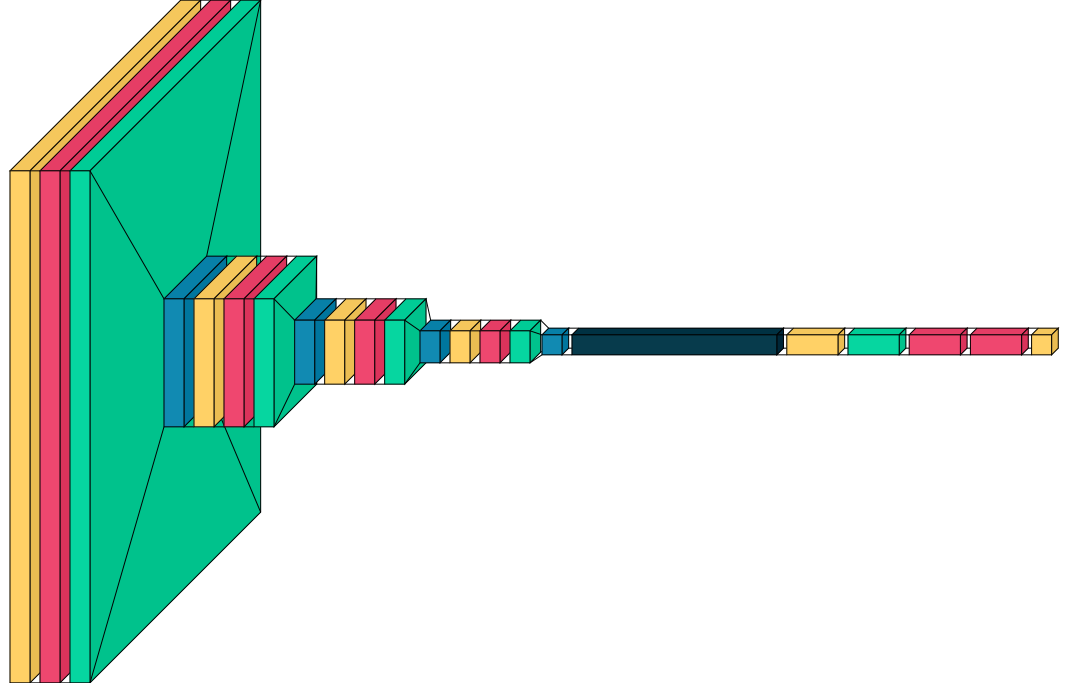

In [ ]:
import visualkeras
from keras.models import load_model

model = load_model("/content/drive/MyDrive/colab/final_project/models/seed100/log_specAugment.h5")

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)